In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay,classification_report,precision_score
from sklearn.metrics import recall_score,f1_score

In [2]:
df = pd.read_csv("C:\\Users\\sanjay\Documents\\All working files\\data\\machine learning data\\hearing_test.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\sanjay\AppData\Local\Temp\ipykernel_9484\2055495534.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\\Users\\sanjay\Documents\\All working files\\data\\machine learning data\\hearing_test.csv")


,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [3]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [4]:
df.isna().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [5]:
X = df.drop(columns=['test_result'],axis=1)
y = df['test_result']

In [6]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [8]:
model = LogisticRegression()
model.fit(scaled_X_train,y_train)

LogisticRegression()

In [9]:
model.coef_

array([[-0.94781254,  3.61032732]])

In [14]:
scaled_X_test

array([[ 0.30832969,  0.84809391],
       [ 0.66937148, -1.00793407],
       [-0.86505614,  0.59499918],
       ...,
       [-1.04557703,  0.87219817],
       [-1.04557703,  0.763729  ],
       [ 1.66223642, -1.16461176]])

In [15]:
y_pred = model.predict(scaled_X_test)

In [17]:
accuracy_score(y_test,y_pred)

0.9016

In [26]:
cm = confusion_matrix(y_test,y_pred,labels=model.classes_)

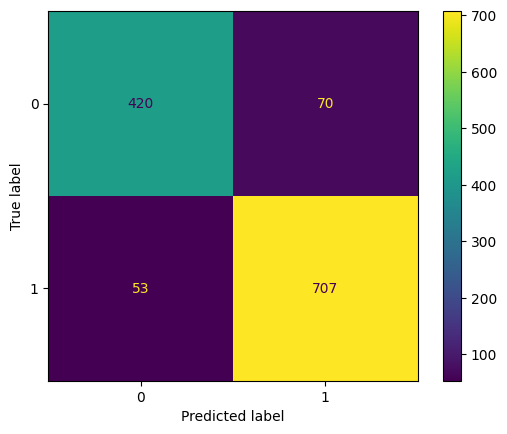

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       490
           1       0.91      0.93      0.92       760

    accuracy                           0.90      1250
   macro avg       0.90      0.89      0.90      1250
weighted avg       0.90      0.90      0.90      1250



In [36]:
precision_score(y_test,y_pred)

0.9099099099099099

In [37]:
recall_score(y_test,y_pred)

0.9302631578947368